In [2]:
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram

In [3]:
### Montagem do circuito
q = QuantumRegister(2)
c = ClassicalRegister(2)
circuito = QuantumCircuit(q, c)
circuito.h(q[0])
circuito.cx(q[0], q[1])
circuito.measure(q[0], c[0])
circuito.measure(q[1], c[1])

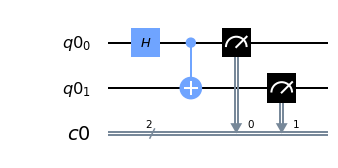

In [4]:
%matplotlib inline
circuito.draw(output='mpl')
# circuito.draw(output='latex')  # segunda opção para visualizar o circuito
# print(circuito)  # terceira opção para visualizar o circuito

In [5]:
## comando para gerar o código QASM do circuito
print(circuito.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q0[2];
creg c0[2];
h q0[0];
cx q0[0],q0[1];
measure q0[0] -> c0[0];
measure q0[1] -> c0[1];



In [6]:
### Comandos para simular a saída do circuito
simulador = BasicAer.get_backend('qasm_simulator')
job1 = execute(circuito, simulador, shots=8024)
resultado1 = job1.result()
contagem1 = resultado1.get_counts()
print(contagem1)

{'00': 3934, '11': 4090}


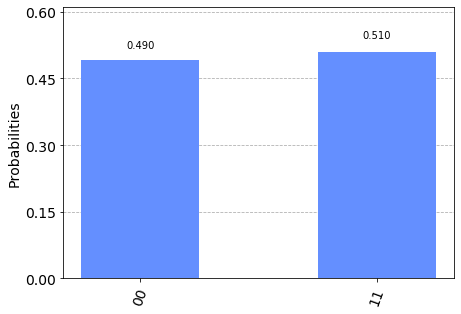

In [7]:
plot_histogram(contagem1)

In [18]:

### Este comando deve ser usado uma única vez, pois o valor do token ficará gravado so seu laptop.
### Vá na página do IBM Q Experience, clique no seu usuário (boneco no alto a direita) para entrar na sua conta. 
### Copie o 'API Token' e cole no comando abaixo.
from qiskit import IBMQ
IBMQ.save_account('token')

In [19]:
### Este comando só vai funcionar se você conseguiu ter sucesso no comando anterior.
### Este comando deve ser dado toda vez que abrir este notebook
from qiskit import IBMQ
provedor = IBMQ.load_account()

In [20]:
### Lista das máquinas disponíveis. 
provedor.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [21]:
### O comando get_backend seleciona o backend
### O comando execute executa o circuito no IBMQX2
### O job entra na fila. A espera pode demorar MUITAS HORAS.
### O comando job_monitor mostra a posição em tempo real.
### Se a conexão com a internet for interrompida, o job é cancelado.
maquina = provedor.get_backend('ibmq_vigo')
job2 = execute(circuito, maquina, shots=1024)
job_monitor(job2)
resultado2 = job2.result()
contagem2 = resultado2.get_counts()
print(contagem2)

Job Status: job has successfully run
{'00': 528, '01': 10, '11': 470, '10': 16}


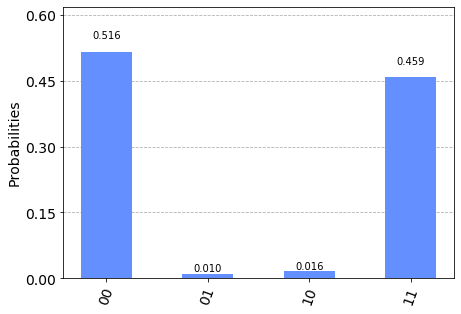

In [23]:
plot_histogram(contagem2)

In [24]:
### Estes comandos executam o circuito no IBMQX4
### O job entra na fila e a posição é mostrada em tempo real. 
### A espera pode demorar muitas horas.
### Se a conexão com a internet for interrompida, o job é cancelado.
maquina = provedor.get_backend('ibmq_ourense')
job3 = execute(circuito, maquina, shots=1024)
job_monitor(job3)
resultado3 = job3.result()
contagem3 = resultado3.get_counts()
contagem3

Job Status: job has successfully run


{'00': 493, '01': 28, '11': 490, '10': 13}

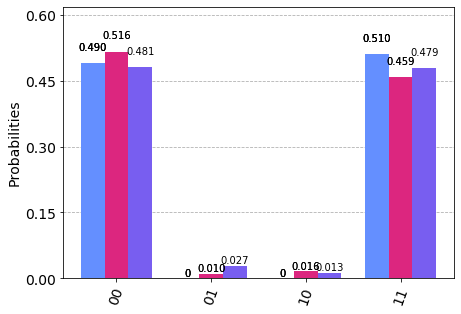

In [25]:
plot_histogram([contagem1,contagem2,contagem3])